In [20]:
"""
Importing modules
"""

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA 
%matplotlib inline
sns.set_style('whitegrid')

In [21]:
# Multi-level keys dataframe
df = pd.read_csv('FTIR_Spectra_instant_coffee.csv', header=[0,1,2])
df.head()

,Sample Number:,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
,Group Code:,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
,Wavenumbers,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,Arabica,...,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta,Robusta
0,810.548,21.227620,10.364243,13.118324,15.668409,16.634960,13.165349,12.607232,16.109228,13.569933,...,11.719168,9.106254,8.343803,9.425893,10.117601,8.962249,10.640825,10.749405,10.240200,10.918806
1,814.408,21.837509,10.569554,13.507084,15.803868,17.055263,13.587405,13.277272,16.340676,13.722907,...,11.829458,9.243099,8.425415,9.863651,10.259102,9.345451,11.139201,10.900052,10.458991,11.371730
2,818.268,22.729975,10.448875,13.473495,15.977607,17.610495,13.998584,13.177923,16.397994,13.891808,...,12.015969,9.305463,8.281403,9.854027,10.165853,9.281158,11.070293,10.762435,10.436443,11.274209
3,822.128,22.517663,10.100696,12.871428,15.569489,17.211594,13.476876,12.570892,16.093075,13.525417,...,11.652528,9.130744,7.897150,9.509302,9.810642,8.781616,10.597854,10.228245,10.067882,10.792971
4,825.988,21.040178,9.620371,12.181919,14.950423,16.217897,12.577613,11.818907,15.660423,12.865660,...,10.864570,8.709047,7.388507,8.851643,9.164671,8.263632,9.987684,9.563644,9.505865,9.997847


Text(0, 0.5, 'Absorbance')

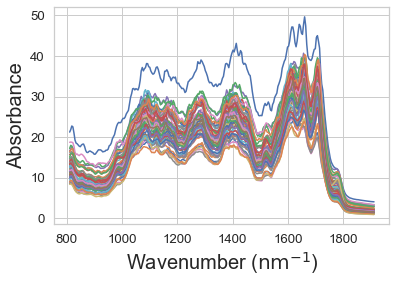

In [22]:
# Drop first two levels of keys (Not required)
df = df.set_axis(df.columns.droplevel(0), axis=1,inplace=False)
df = df.set_axis(df.columns.droplevel(0), axis=1,inplace=False)

fig, ax1 = plt.subplots()
ax1.plot(df['Wavenumbers'], df['Arabica'])
ax1.plot(df['Wavenumbers'], df['Robusta'])
ax1.set_xlabel('Wavenumber ($\mathrm{nm}^{-1}$)', fontsize=20)
ax1.set_ylabel('Absorbance', fontsize = 20)

In [23]:
# Transposing to arrange as N_samples x N_features
df.reset_index(drop=True, inplace=True)
df = df.T

# Input features, and response variable
x = df.iloc[1:,df.keys()].values
x = StandardScaler().fit_transform(x)
Y = pd.DataFrame(df.index)[1:].to_numpy()
Y = Y.ravel()

As a fisrt step (of EDA), it is good to check whether PCA can help disntinguishing the classes. 

Variation explanined by PCA 1[0.91064972]


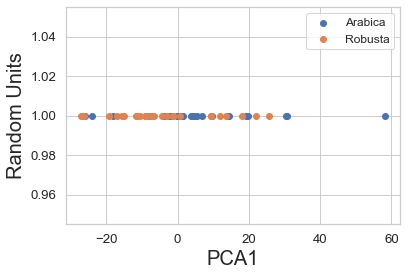

In [25]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(x)
print('Variation explanined by PCA 1{:}'.format(pca.explained_variance_ratio_))

fig, ax = plt.subplots()
variety_names = ['Arabica','Robusta']
lw = 2
x_dum = np.ones(len(Y))
for color, variety in zip(colors, variety_names):
    plt.scatter(X_pca[Y == variety, 0], x_dum[Y == variety], label=variety)
    
ax.set_xlabel('PCA1', fontsize=20)
ax.set_ylabel('Random Units', fontsize = 20)
ax.legend(fontsize=12)

PCA vector does explain most of the variation in the data (91%) but couldn't help in differentiating the two classes. Hence, the next step is to use the label information and supervised classification tecnique (LDA) to find the direction which seperates the classes.

In [12]:
# Three different Models: LDA, KNN, and NCA
lda = LDA()
lda_comp = lda.fit_transform(x,Y)

# All results in one dataframe
results = pd.DataFrame(data={'LDA': lda_comp.ravel(),'Variety': Y}) 

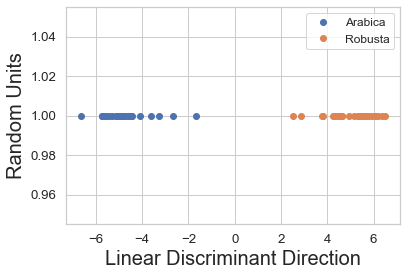

In [26]:
fig, ax2 = plt.subplots()
for key, group in results.groupby(['Variety']):
    ax2.plot(group['LDA'],   np.ones(len(group)), 'o', label=key)


ax2.set_xlabel('Linear Discriminant Direction', fontsize=20)
ax2.set_ylabel('Random Units', fontsize = 20)
ax2.legend(fontsize=12)

LDA as a supervised classification helped to distinguih the two variety of coffee.

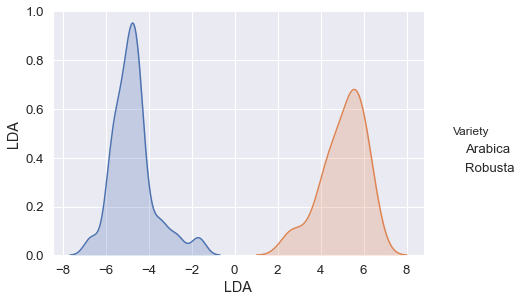

In [27]:
sns.set(font_scale=1.2)
sns.pairplot(results, hue="Variety", height=4, aspect=1.5)

A key assumption in the LDA method is that the data among each class is normally distributed. Since the number of input variables (wavelengths) is large, it is difficult to visualize the distribution of raw data in 3D. However, the above plot shows the distribution in the LDA-vector space. The distribution is quite close to normal, and thus supports the use of LDA method.  